Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Rescaling, BatchNormalization
from tensorflow.keras.models import Sequential

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
root_path = 'gdrive/My Drive/Colab Notebooks/CNN Assignment/'

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:

# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/My Drive/Colab Notebooks/CNN Assignment/Train")
data_dir_test = pathlib.Path('gdrive/My Drive/Colab Notebooks/CNN Assignment/Test')

In [ ]:
data_dir_train

PosixPath('gdrive/My Drive/Colab Notebooks/CNN Assignment/Train')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2248
118


In [ ]:
melanoma =list(data_dir_train.glob('melanoma/*'))

In [ ]:
len(melanoma)

438

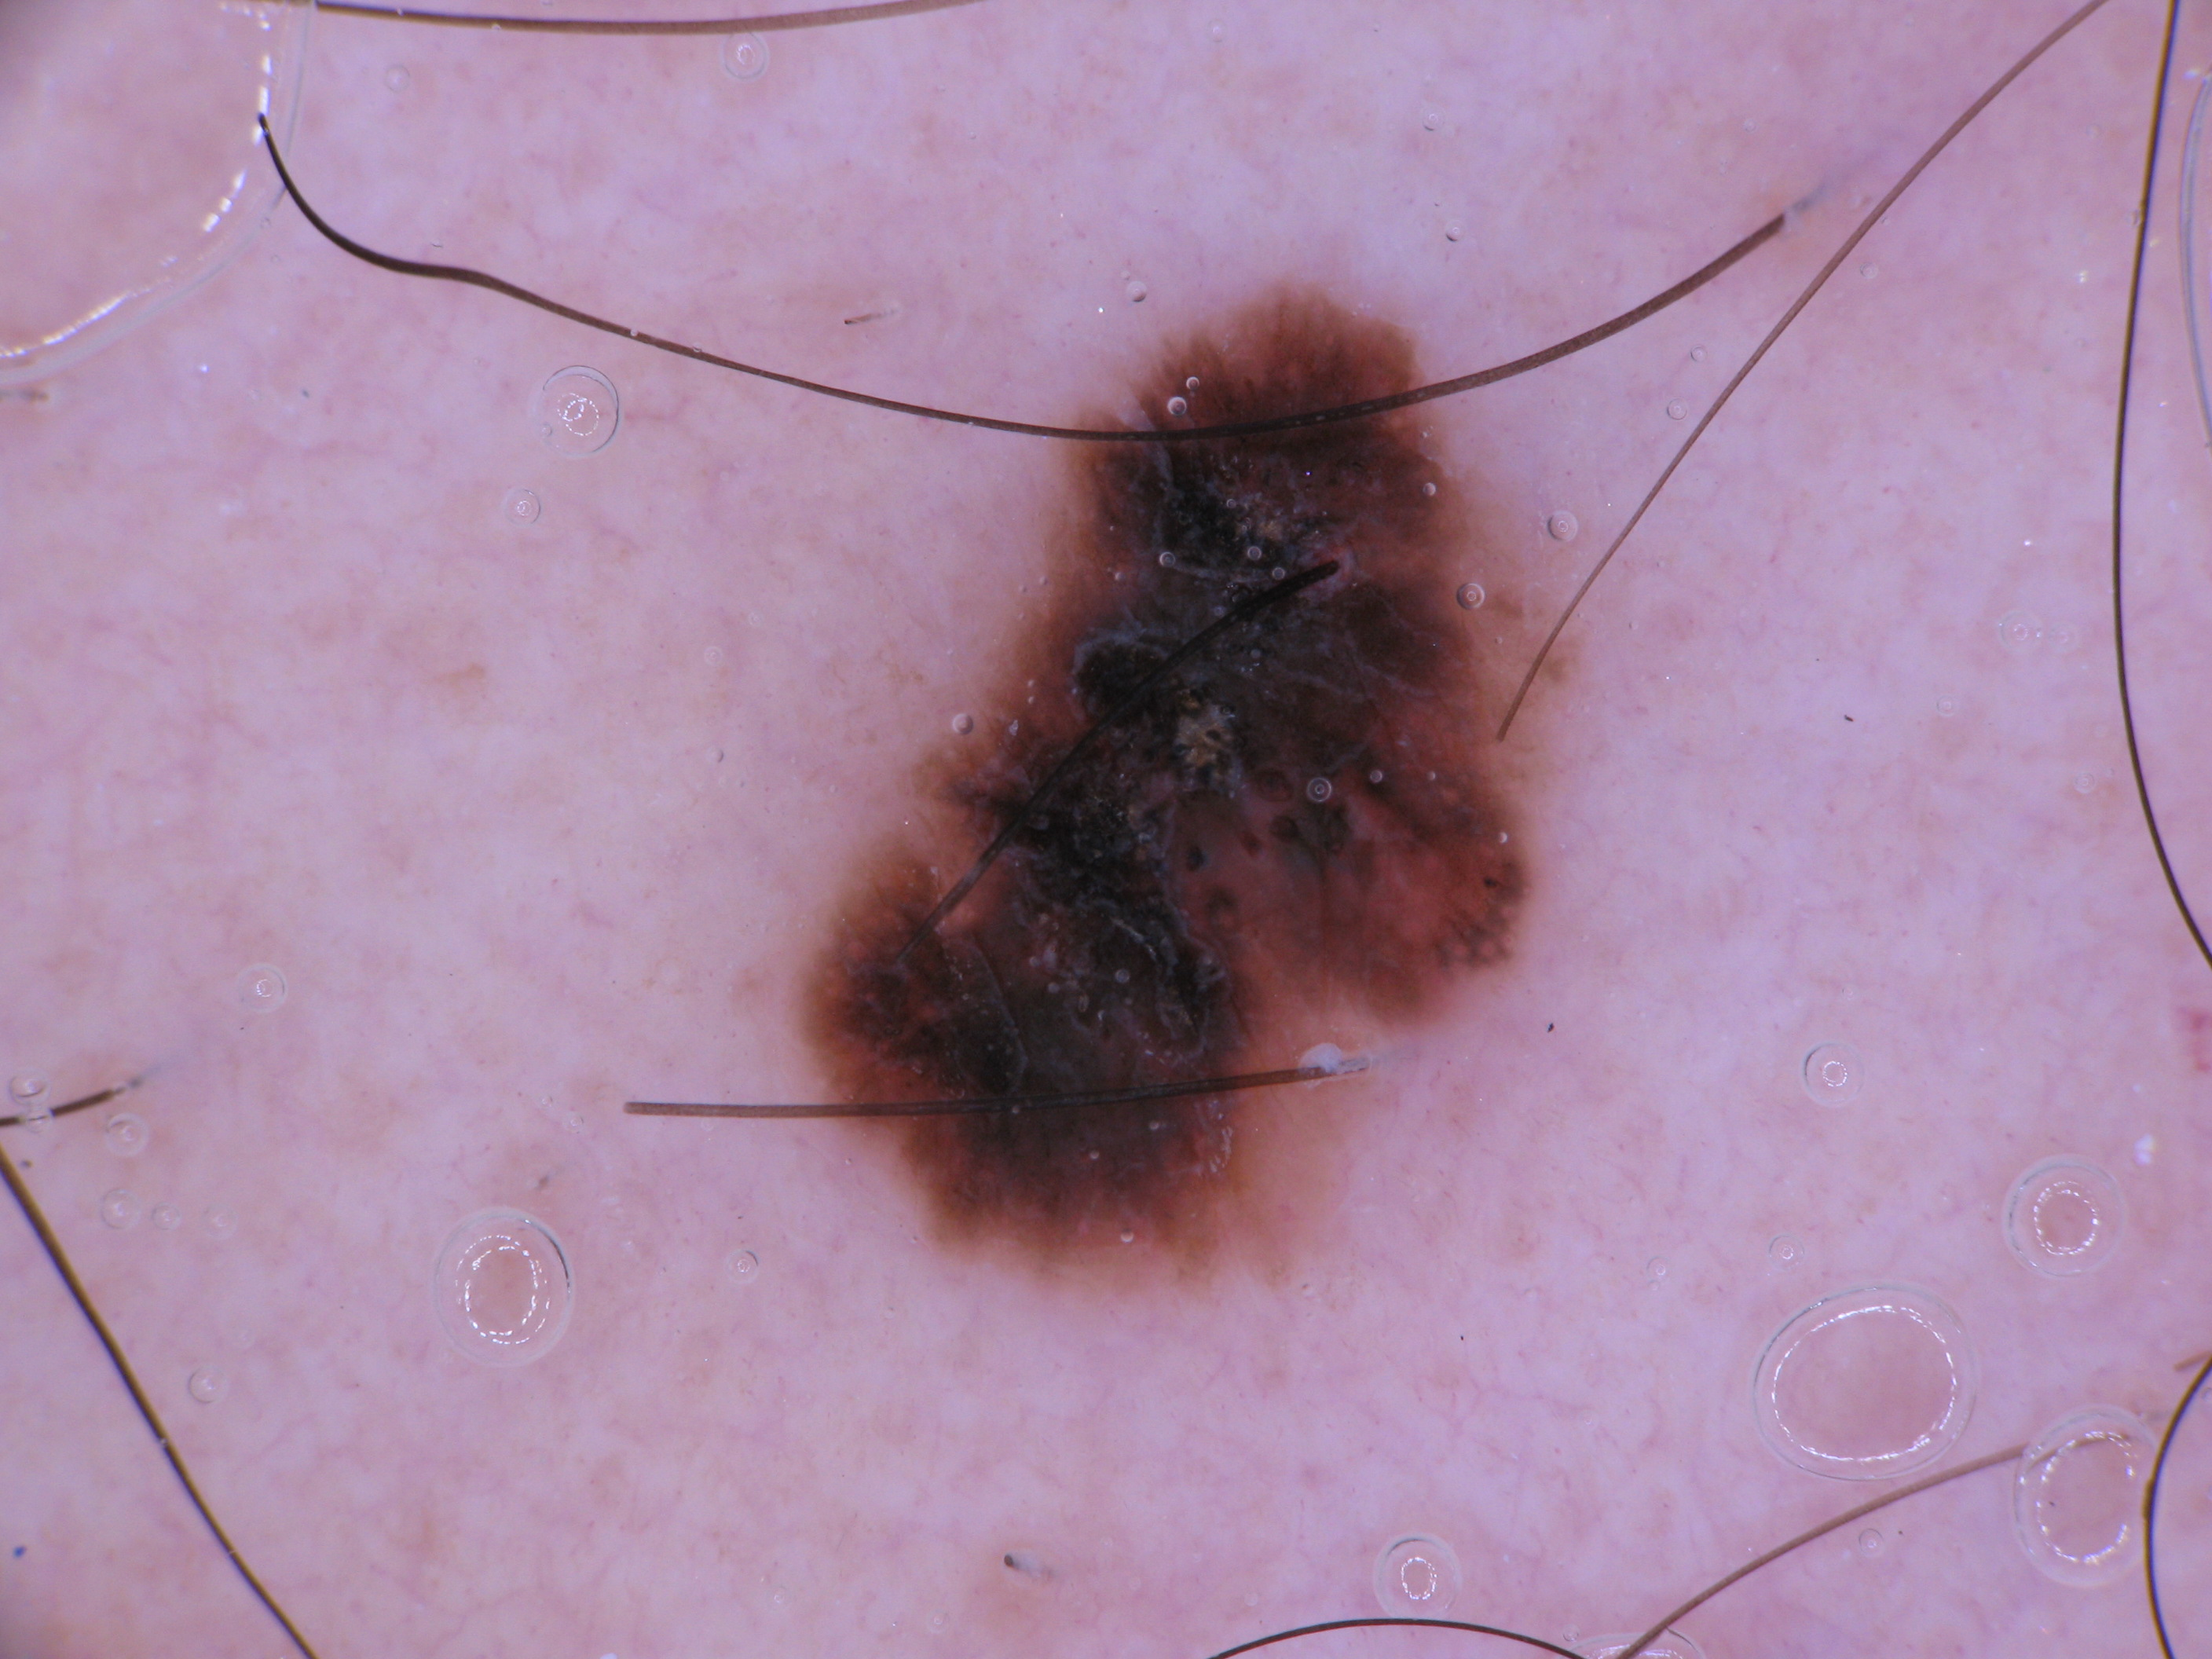

In [ ]:
PIL.Image.open(str(melanoma[0]))

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

Found 6748 files belonging to 9 classes.
Using 5399 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
)

Found 6748 files belonging to 9 classes.
Using 1349 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

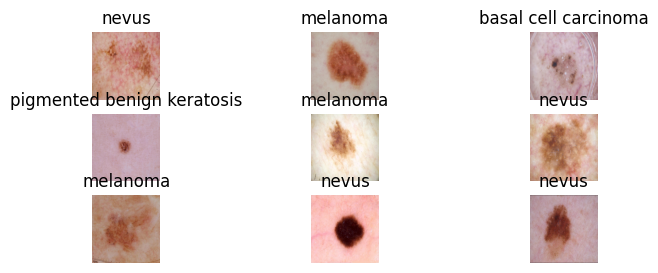

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
fig = plt.figure(figsize=(8,3))
for image,lables in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, 1 + i)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[lables[i]])
    plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [ ]:
for image_batch,label_batch in train_ds:
  print(image_batch.shape)
  print(label_batch.shape)
  break

(32, 180, 180, 3)
(32,)


`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
num_classes = len(class_names)
model=Sequential()

model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

model.add(Conv2D(16, 3, padding='same', activation='relu'))

model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))

model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))

model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 45, 45, 64)       

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 75s 1s/step - loss: 0.3982 - accuracy: 0.8505 - val_loss: 1.8753 - val_accuracy: 0.5189
Epoch 2/20
57/57 [==============================] - 63s 1s/step - loss: 0.3340 - accuracy: 0.8694 - val_loss: 2.1929 - val_accuracy: 0.5212
Epoch 3/20
57/57 [==============================] - 60s 1s/step - loss: 0.2946 - accuracy: 0.8844 - val_loss: 1.9917 - val_accuracy: 0.5323
Epoch 4/20
57/57 [==============================] - 65s 1s/step - loss: 0.2897 - accuracy: 0.8916 - val_loss: 2.0309 - val_accuracy: 0.5167
Epoch 5/20
57/57 [==============================] - 64s 1s/step - loss: 0.2777 - accuracy: 0.8949 - val_loss: 2.4237 - val_accuracy: 0.5122
Epoch 6/20
57/57 [==============================] - 64s 1s/step - loss: 0.2571 - accuracy: 0.8977 - val_loss: 2.1493 - val_accuracy: 0.5189
Epoch 7/20
57/57 [==============================] - 64s 1s/step - loss: 0.2053 - accuracy: 0.9172 - val_loss: 2.3925 - val_accuracy: 0.5234
Epoch 8/20
57/57 [==

### Visualizing training results

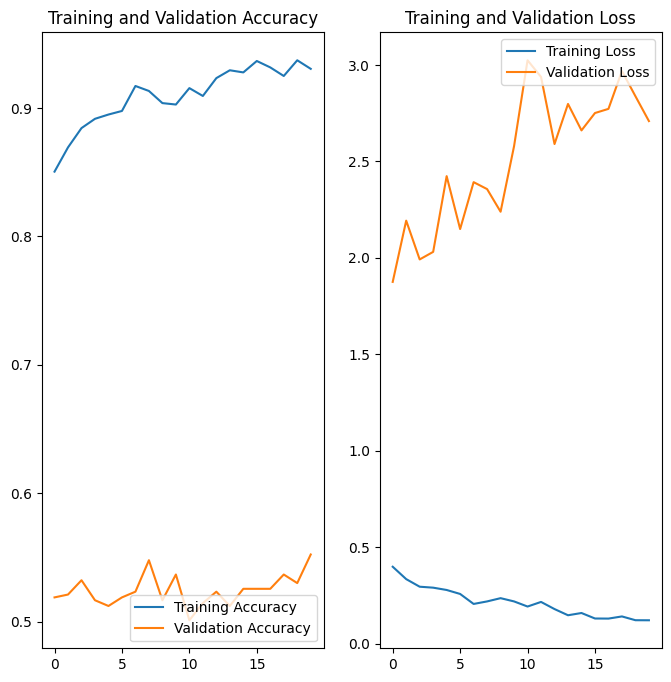

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = len(class_names)
model=Sequential()

model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

model.add(Conv2D(16, 3, padding='same', activation='relu'))

model.add(MaxPooling2D())

model.add(Dropout(0.2))
model.add(Conv2D(32, 3, padding='same', activation='relu'))

model.add(MaxPooling2D())

model.add(Dropout(0.2))
model.add(Conv2D(64, 3, padding='same', activation='relu'))

model.add(MaxPooling2D())

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes))


### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 75s 1s/step - loss: 2.4222 - accuracy: 0.2168 - val_loss: 2.0288 - val_accuracy: 0.2316
Epoch 2/20
57/57 [==============================] - 66s 1s/step - loss: 1.9012 - accuracy: 0.2991 - val_loss: 1.8181 - val_accuracy: 0.3474
Epoch 3/20
57/57 [==============================] - 68s 1s/step - loss: 1.7818 - accuracy: 0.3419 - val_loss: 1.7364 - val_accuracy: 0.3831
Epoch 4/20
57/57 [==============================] - 66s 1s/step - loss: 1.6807 - accuracy: 0.3974 - val_loss: 1.6350 - val_accuracy: 0.3430
Epoch 5/20
57/57 [==============================] - 68s 1s/step - loss: 1.5616 - accuracy: 0.4419 - val_loss: 1.5910 - val_accuracy: 0.4477
Epoch 6/20
57/57 [==============================] - 67s 1s/step - loss: 1.5397 - accuracy: 0.4608 - val_loss: 1.7625 - val_accuracy: 0.3853
Epoch 7/20
57/57 [==============================] - 65s 1s/step - loss: 1.4627 - accuracy: 0.4925 - val_loss: 1.4073 - val_accuracy: 0.5278
Epoch 8/20
57/57 [==

### Visualizing the results

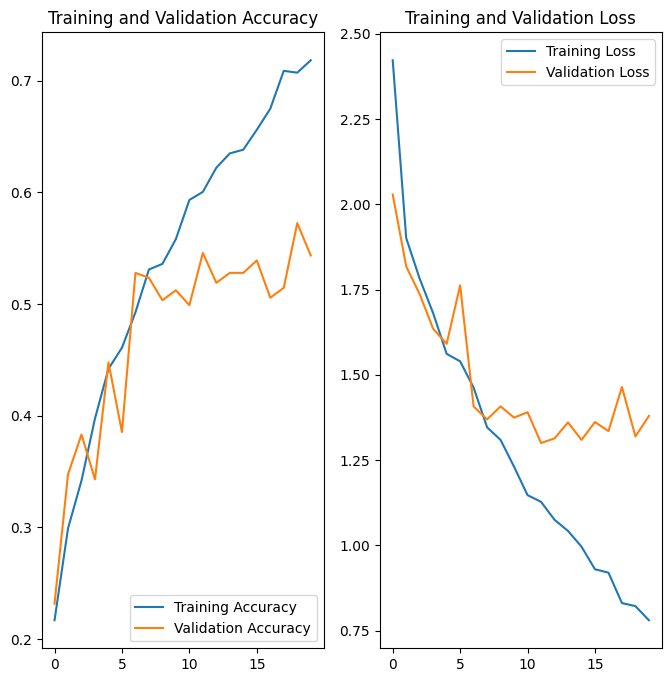

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
for i in class_names:
  a=list(data_dir_train.glob(f'{i}/*'))
  b=len(a)
  c=round(100*(b/2249),2)
  print(i,c)


actinic keratosis 5.07
basal cell carcinoma 17.12
dermatofibroma 4.22
melanoma 19.48
nevus 15.87
pigmented benign keratosis 20.54
seborrheic keratosis 3.42
squamous cell carcinoma 8.05
vascular lesion 6.18


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#**seborrheic keratosis 3.42**
#### - Which classes dominate the data in terms proportionate number of samples?
#**pigmented benign keratosis 20.54**



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset, i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E3EB0A98040>: 100%|██████████| 500/500 [00:30<00:00, 16.49 Samples/s]


Initialised with 385 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E3EAFC06020>: 100%|██████████| 500/500 [00:24<00:00, 20.02 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E3EAEB6B670>: 100%|██████████| 500/500 [00:23<00:00, 21.34 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E3EBDA93970>: 100%|██████████| 500/500 [01:42<00:00,  4.87 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7E3EAFC04640>: 100%|██████████| 500/500 [01:44<00:00,  4.80 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E3EBDAC2590>: 100%|██████████| 500/500 [00:24<00:00, 20.83 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7E3EAFD1A1A0>: 100%|██████████| 500/500 [00:50<00:00,  9.90 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E3EBC8F0DF0>: 100%|██████████| 500/500 [00:23<00:00, 21.37 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E3EB0B84CA0>: 100%|██████████| 500/500 [00:23<00:00, 21.13 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_old = [a for a in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(len(path_list_new))
print(len(path_list_old))

4500
2248


In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_old = [os.path.basename(os.path.dirname(b)) for b in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(len(lesion_list_new))
print(len(lesion_list_old))

4500
2248


In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict_old = dict(zip(path_list_old, lesion_list_old))
print(len(dataframe_dict_new))
print(len(dataframe_dict_old))

4500
2248


In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df1 = pd.DataFrame(list(dataframe_dict_old.items()),columns = ['Path','Label'])

df3 = pd.concat([df1, df2], ignore_index=True)
print(len(df2))
print(len(df1))
print(len(df3))

4500
2248
6748


In [ ]:
df2['Label'].value_counts()

Label
vascular lesion               500
squamous cell carcinoma       500
seborrheic keratosis          500
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
Name: count, dtype: int64

In [ ]:
df1['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          385
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

In [ ]:
df3

Path  \
0     gdrive/My Drive/Colab Notebooks/CNN Assignment...   
1     gdrive/My Drive/Colab Notebooks/CNN Assignment...   
2     gdrive/My Drive/Colab Notebooks/CNN Assignment...   
3     gdrive/My Drive/Colab Notebooks/CNN Assignment...   
4     gdrive/My Drive/Colab Notebooks/CNN Assignment...   
...                                                 ...   
6743  gdrive/My Drive/Colab Notebooks/CNN Assignment...   
6744  gdrive/My Drive/Colab Notebooks/CNN Assignment...   
6745  gdrive/My Drive/Colab Notebooks/CNN Assignment...   
6746  gdrive/My Drive/Colab Notebooks/CNN Assignment...   
6747  gdrive/My Drive/Colab Notebooks/CNN Assignment...   

                           Label  
0                vascular lesion  
1                vascular lesion  
2                vascular lesion  
3                vascular lesion  
4                vascular lesion  
...                          ...  
6743  pigmented benign keratosis  
6744  pigmented benign keratosis  
6745  pigmented benign keratosis  
6746  pigmented benign keratosis  
6747  pigmented benign keratosis  

[6748 rows x 2 columns]

In [ ]:
df3['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          885
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [11]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [12]:
data_dir_train= pathlib.Path("gdrive/My Drive/Colab Notebooks/CNN Assignment/Train")

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6748 files belonging to 9 classes.
Using 5399 files for training.


#### **Todo:** Create a validation dataset

In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6748 files belonging to 9 classes.
Using 1349 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [14]:
## your code goes here
num_classes = len(class_names)
model=Sequential()

model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))

model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D())

model.add(Dropout(0.4))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D())

model.add(Dropout(0.4))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D())

model.add(Dropout(0.4))
model.add(Flatten())

model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [15]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:

## Your code goes here, use 20 epochs.

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
  5/169 [..............................] - ETA: 19:02 - loss: 17.8227 - accuracy: 0.1750

#### **Todo:**  Visualize the model results

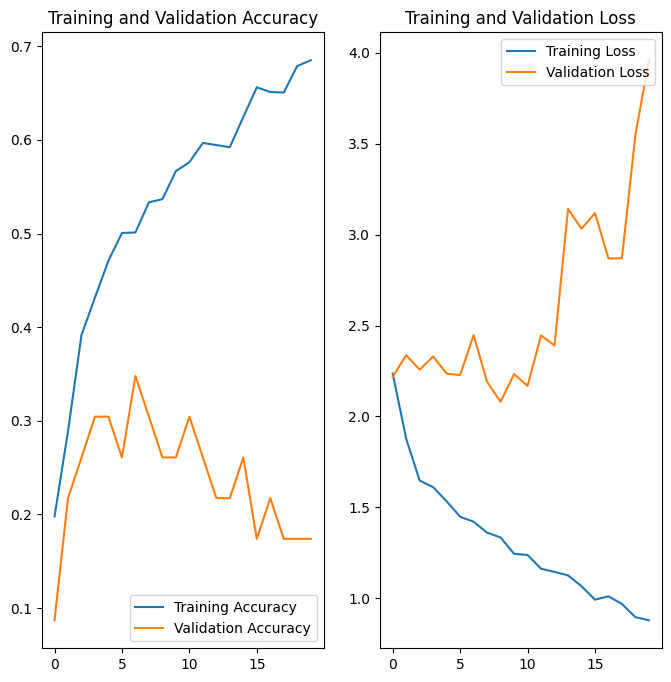

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

